# Linear Regression Assignment 

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

### Data understanding

In [2]:
# Reading the csv file
carlist=pd.read_csv("CarPrice_Assignment.csv",encoding ='ISO-8859-1')
carlist.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
# Check for missing data
print(carlist.shape)
print(carlist.info())

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
pea

In [4]:
# Drop duplicates if any 
carlist.drop_duplicates(inplace=True)
carlist.shape
# There are no duplicates in the data set

(205, 26)

### Data Preparation

Extracting car company name from the CarName column and drop the CarName variable from the dataset


In [5]:
carlist['CarCompany']=carlist['CarName'].str.split(" ").str[0]
carlist.drop(columns=['CarName'],inplace=True)
carlist['CarCompany'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: CarCompany, dtype: object

Conversion of string representation of numbers to integers

In [6]:
# List of variables to map
varlist =  ['doornumber', 'cylindernumber']

# Defining the map function
def numeric_map(x):
    return x.map({'two': 2, 'three':3,'four': 4,'five':5,'six':6,'eight':8,'twelve':12})

# Applying the function to the car list
carlist[varlist] = carlist[varlist].apply(numeric_map)
carlist[varlist].head()

,doornumber,cylindernumber
0,2,4
1,2,4
2,2,6
3,4,4
4,4,5


In [7]:
# Function to convert object variables to categorical variables
def object_to_category(df,col):
    df[col]=df[col].astype('category')
    
# Converting below object variables to categorical variables
object_to_category(carlist,'CarCompany')
object_to_category(carlist,'fueltype')
object_to_category(carlist,'aspiration')
object_to_category(carlist,'carbody')
object_to_category(carlist,'drivewheel')
object_to_category(carlist,'enginelocation')
object_to_category(carlist,'enginetype')
object_to_category(carlist,'fuelsystem')

# Check the datatypes of the variables
carlist.dtypes

car_ID                 int64
symboling              int64
fueltype            category
aspiration          category
doornumber             int64
carbody             category
drivewheel          category
enginelocation      category
wheelbase            float64
carlength            float64
carwidth             float64
carheight            float64
curbweight             int64
enginetype          category
cylindernumber         int64
enginesize             int64
fuelsystem          category
boreratio            float64
stroke               float64
compressionratio     float64
horsepower             int64
peakrpm                int64
citympg                int64
highwaympg             int64
price                float64
CarCompany          category
dtype: object

In [8]:
# Checking the values of car company
carlist.groupby('CarCompany').CarCompany.count()

CarCompany
Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: CarCompany, dtype: int64

##### Data Quality Issues:
1. Incorrect spellings of five car company names were found. Correcting them manually.
2. Nissan and nissan are taken as two different company names as their cases are different. Changing the case of entire column to lower case.

In [9]:
carlist['CarCompany'].replace('maxda','mazda', inplace=True)
carlist['CarCompany'].replace('porcshce','porsche', inplace=True)
carlist['CarCompany'].replace('toyouta','toyota', inplace=True)
carlist['CarCompany'].replace('vokswagen','volkswagen', inplace=True)
carlist['CarCompany'].replace('vw','volkswagen', inplace=True)

# Changing the entire column to lower case
carlist['CarCompany'] = carlist['CarCompany'].apply(lambda x: x.lower())

# Checking unique values of car company after spell check
carlist.CarCompany.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Since the column of car company was changed to lower case, we change the case of all other columns containing strings to lower case.

In [10]:
# Function to change the case of a column to lower case
def change_case_to_lower(df,col):
    df[col] = df[col].apply(lambda x: x.lower())
    
# The case of the following categorical variables have to be changed
change_case_to_lower(carlist,'fueltype')
change_case_to_lower(carlist,'aspiration')
change_case_to_lower(carlist,'carbody')
change_case_to_lower(carlist,'drivewheel')
change_case_to_lower(carlist,'enginelocation')
change_case_to_lower(carlist,'enginetype')
change_case_to_lower(carlist,'fuelsystem')

### Data Visualisation and Summarisation

Statistic summary of variables

In [11]:
carlist.describe()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,3.121951,98.756585,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,0.994966,6.021776,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Car Id consists of unique values and do not add significance in the model building. Hence dropping the variable.

In [12]:
carlist.drop(['car_ID'], axis = 1, inplace = True)

#### Visualise categorical variables

In [13]:
# Function to perform univariate Analysis of categorical variables
def visualise_uni_cat_data(df,col,m,x=14,y=7):
    plt.figure(figsize=(x,y))
    plt.subplot(2,2,m)
    df[col].value_counts(normalize= True).plot(figsize=(x,y),kind='bar')
    #plt.title("Frequency Distribution")
    plt.xlabel(col)

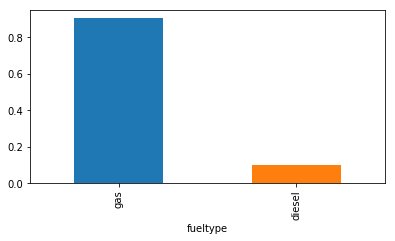

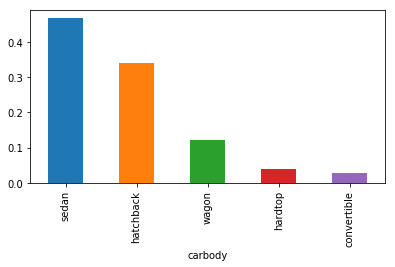

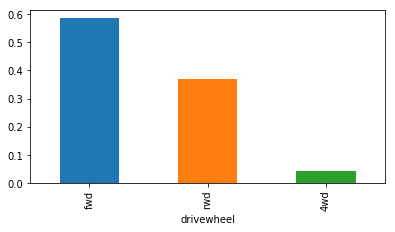

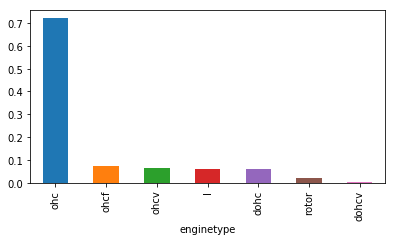

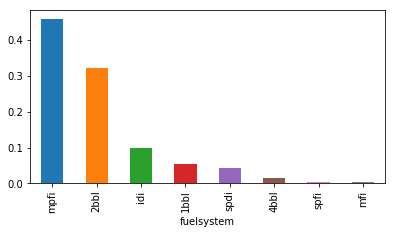

In [14]:
# Spread of fuel type
visualise_uni_cat_data(carlist,'fueltype',1)
# Spread of car body 
visualise_uni_cat_data(carlist,'carbody',2)
# Spread of drive wheel 
visualise_uni_cat_data(carlist,'drivewheel',3)
# Spread of engine type 
visualise_uni_cat_data(carlist,'enginetype',4)
# Spread of fuel system 
visualise_uni_cat_data(carlist,'fuelsystem',1)

###### Observations :
1. Over 85% of cars have gas as fuel
2. Most car company produces sedans (~ 47%) over other types of carbody.
3. Most cars have forward wheel drive (fwd) (~ 59%) over other types of drivewheels(rear wheel drive-rwd & four wheel drive-4wd)
4. More than 70 % of the vehicle has ohc type of Engine
5. More than 40% of the cars have multi point fuel injection system(mpfi) in them.

#### Visualise continuous variables

In [15]:
# Function to perform univariate Analysis of continuous variables
def visualise_uni_cont_data(df,col):
    plt.figure(figsize=(10,7))
    df.hist(column=col, bins=5)
    plt.xlabel(col);

<Figure size 720x504 with 0 Axes>

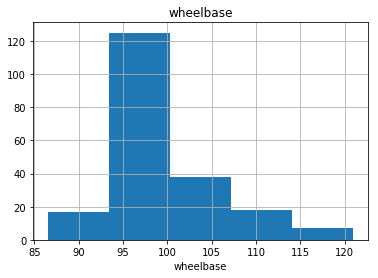

<Figure size 720x504 with 0 Axes>

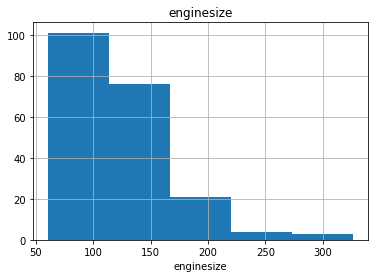

In [16]:
# Spread of wheel base
visualise_uni_cont_data(carlist,'wheelbase')
# Spread of engine size
visualise_uni_cont_data(carlist,'enginesize')

<Figure size 720x504 with 0 Axes>

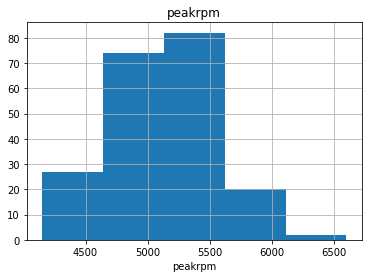

<Figure size 720x504 with 0 Axes>

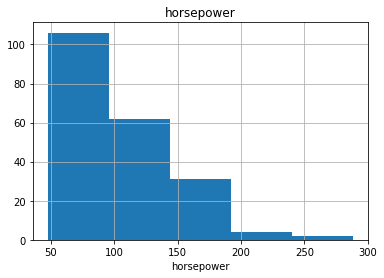

In [17]:
# Spread of peakrpm
visualise_uni_cont_data(carlist,'peakrpm')
# Spread of horsepower
visualise_uni_cont_data(carlist,'horsepower')

<Figure size 720x504 with 0 Axes>

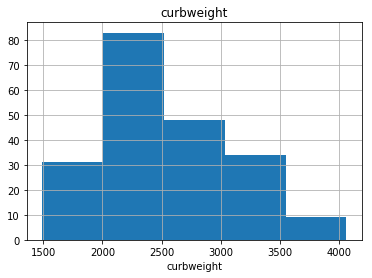

<Figure size 720x504 with 0 Axes>

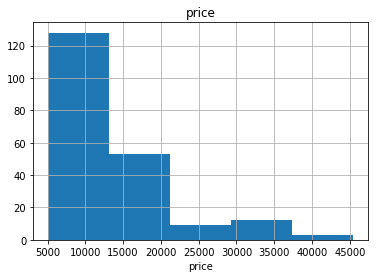

<Figure size 720x504 with 0 Axes>

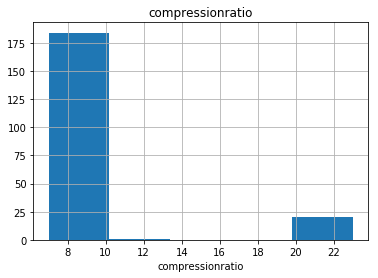

In [18]:
# Spread of curbweight
visualise_uni_cont_data(carlist,'curbweight')
# Spread of price
visualise_uni_cont_data(carlist,'price')
# Spread of compressionratio
visualise_uni_cont_data(carlist,'compressionratio')

###### Observations:
1. Most cars have a wheel base ranging from 94 to 100
2. Most cars have small enginesize in the range of 60 to 190. 
3. peak rpm is mostly distributed between 4600 to 5700
4. Most vehicle has horsepower 50 to 125
5. Most of the car has a Curb Weight is in range 1900 to 3100
6. Most vehicles are in price range 5000 to 21000
7. compression ratio lies in two major ranges from 7-10 and 20-22 

#### Bivariate Analysis 

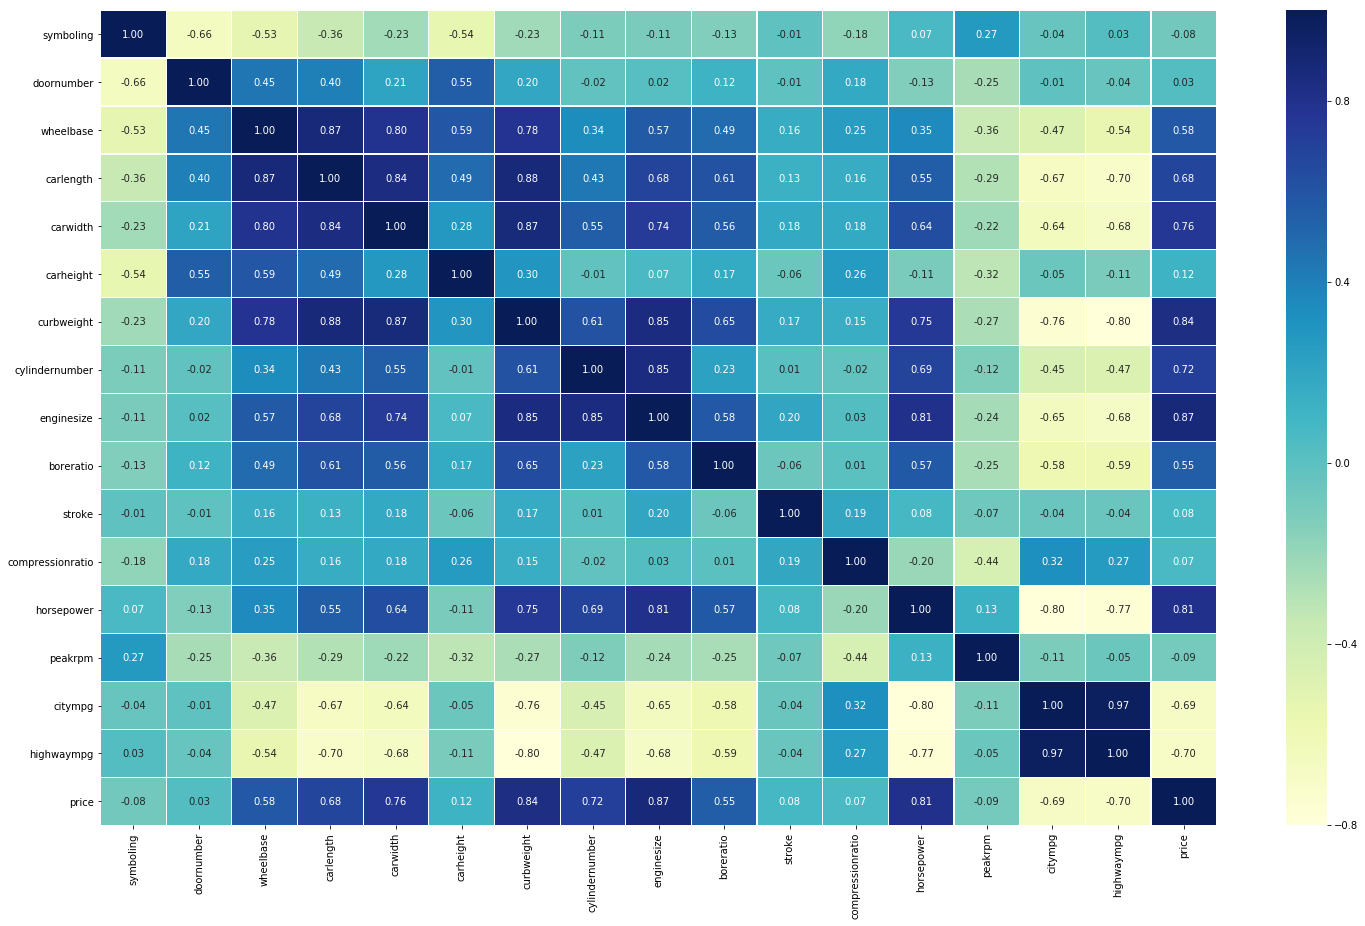

In [19]:
corr = carlist.corr()
plt.figure(figsize=(25,15))
a = sns.heatmap(corr,cmap="YlGnBu", annot=True, fmt='.2f',linewidths=0.2)

###### Observations :
1. Dimensions of the car such as length and width, curbweight,cylindernumber,enginesize,bore ratio and horsepower are highly correlated with price.Among these, enginesize is highly correlated (0.87) with price.
2. Wheelbase and boreratio are mildly correlated with price
3. citympg and highwaympg are negatively corelated to price but highly correlated with each other.
4. Symboling is negatively correlated with all the features

In [20]:
# Function to perform bivariate analysis of variables 
def visualise_biv_data(df,col1,col2,x=10,y=5,clr=None):
    plt.figure(figsize=(x,y))
    sns.boxplot(x=df[col1],y = df[col2],hue=clr, data = df)
    plt.show()

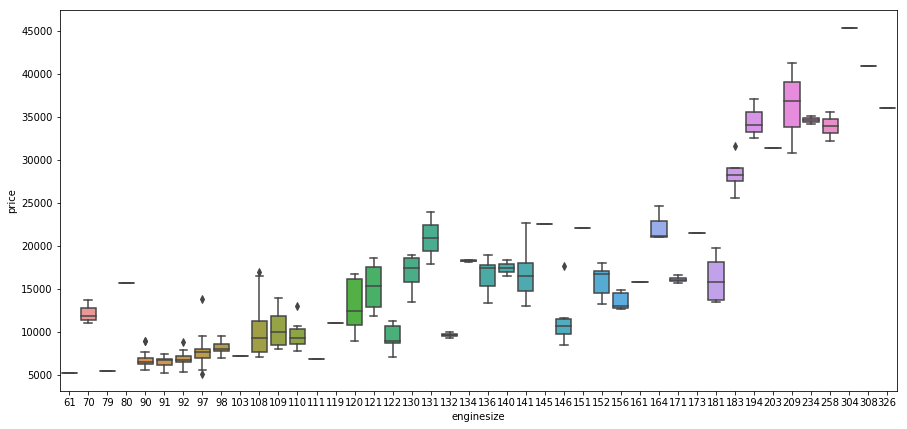

In [21]:
# enginesize versus price 
visualise_biv_data(carlist,'enginesize','price',15,7)

###### Observations:
1. Larger the engine size, higher the price of the car

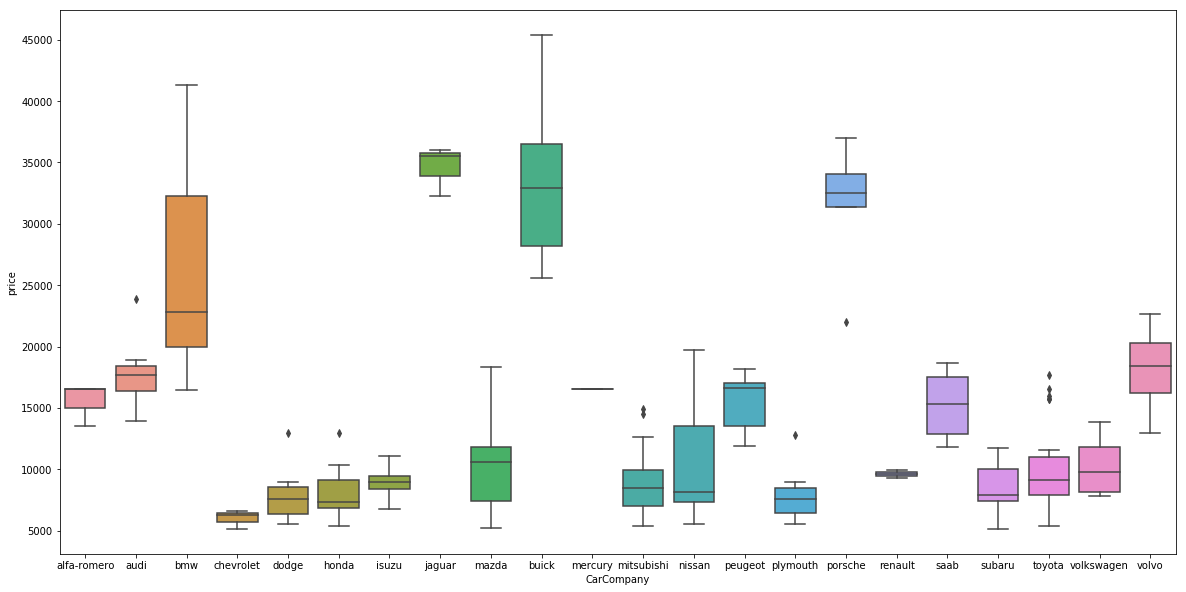

In [22]:
# Car company versus price
visualise_biv_data(carlist,'CarCompany','price',20,10)

###### Observations :
1. BMW,Jaguar,Buick and Porsche produces expensive cars more than 25000
2. BMW has cars in wide variety of ranges
3. Most of the cars lay in the range of 5000-25000
4. Chevrolet,Dodge,Honda,Isuzu,Mitsubishi,Plymouth,Renault,Subaru and Toyota produces budget car models 

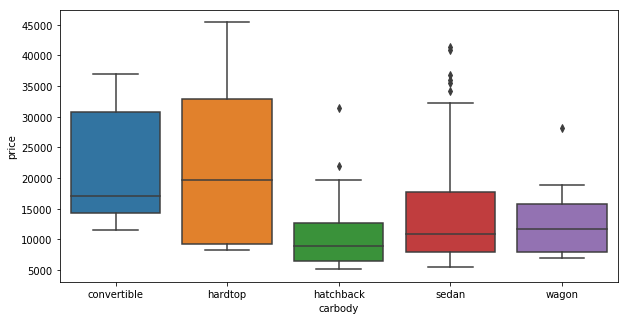

In [23]:
# Car body versus price
visualise_biv_data(carlist,'carbody','price')

###### Observations :
1. Hardtop model are expensive followed by convertible and sedan body styles

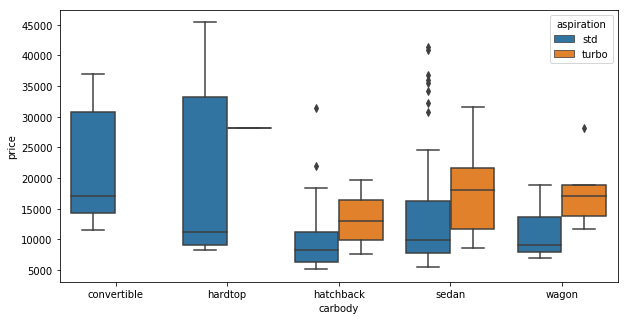

In [24]:
# carbody versus price with aspiration as hue
visualise_biv_data(carlist,'carbody','price',10,5,'aspiration')

###### Observations :
1. Convertibles are the only expensive cars with aspiration of standard edition
2. Hatchback,Sedan and Wagon turbo models are available below 25000
3. Only very few model of hardtop have turbo models

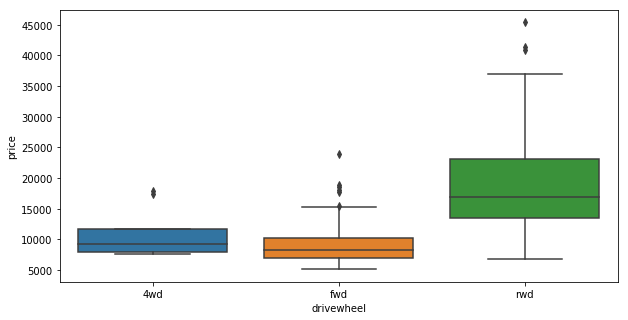

In [25]:
# drivewheel versus price 
visualise_biv_data(carlist,'drivewheel','price')

###### Observations :
1. rwd wheel drive vehicles are highly prices

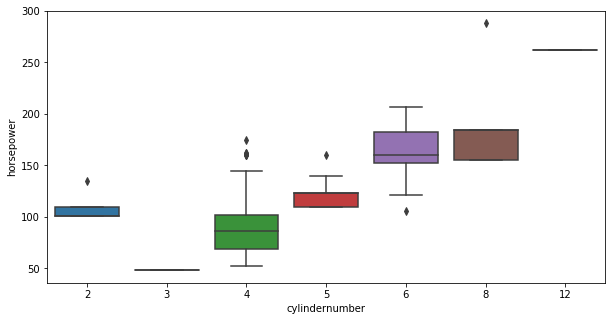

In [26]:
# Number of cylinders versus Horse power
visualise_biv_data(carlist,'cylindernumber','horsepower')

###### Observations :
1. Vehicle with above 200 horsepower has 12 cyclinders (Jaguar XK)
2. Vehicles in the range of 150 to 200 horsepower can either have 6 or 8 cylinders

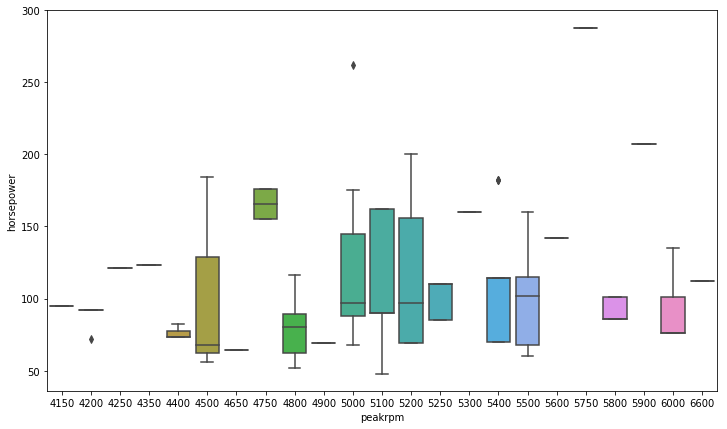

In [27]:
# peakrpm versus horsepower 
visualise_biv_data(carlist,'peakrpm','horsepower',12,7)

##### Observations:
1. For peakrpm at 4500,500,5100 and 5200, a wide range of horsepower is available. Torque could be the contributing factor for the increase in horsepower.

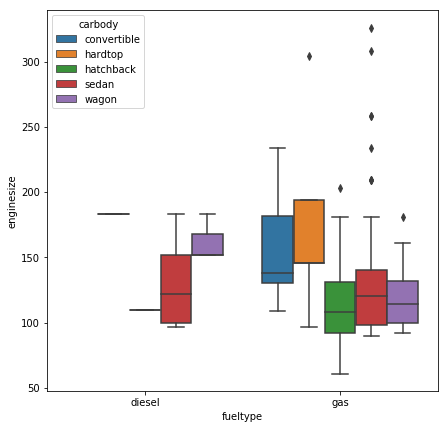

In [28]:
# Fuel type versus enginesize with carbody as hue
visualise_biv_data(carlist,'fueltype','enginesize',7,7,'carbody')

###### Observations:
1. Convertibles, Hardtop and Hatchback have only gas as their fuel
2. Sedans and Wagon have both diesel and gas as fuel options

### Dummy variable creation

######  Steps to create dummy variables
1. Get the dummy variables for the feature and store it in a new variable - 'dummy_variable' after dropping the first dummy vairable column
2. Add the results to the original carlist dataframe
3. Rename the column to be in sync with the parent column (optional)
4. Drop the parent variable from the main data set 

##### Fuel type

In [29]:
dummy_variable = pd.get_dummies(carlist['fueltype'], drop_first = True)
carlist = pd.concat([carlist, dummy_variable], axis = 1)
carlist.rename(columns={'gas':'fueltype_gas'},inplace =True)
carlist.drop(['fueltype'], axis = 1, inplace = True)

##### Aspiration

In [30]:
dummy_variable = pd.get_dummies(carlist['aspiration'], drop_first = True)
carlist = pd.concat([carlist, dummy_variable], axis = 1)
carlist.rename(columns={'turbo':'aspiration_turbo'},inplace =True)
carlist.drop(['aspiration'], axis = 1, inplace = True)

##### Engine location

In [31]:
dummy_variable = pd.get_dummies(carlist['enginelocation'], drop_first = True)
carlist = pd.concat([carlist, dummy_variable], axis = 1)
carlist.rename(columns={'rear':'enginelocation_rear'},inplace =True)
carlist.drop(['enginelocation'], axis = 1, inplace = True)

##### Drive Wheel

In [32]:
dummy_variable = pd.get_dummies(carlist['drivewheel'], drop_first = True)
carlist = pd.concat([carlist, dummy_variable], axis = 1)
carlist.rename(columns={'fwd':'drivewheel_fwd','rwd':'drivewheel_rwd'},inplace =True)
carlist.drop(['drivewheel'], axis = 1, inplace = True)

##### Car body

In [33]:
dummy_variable = pd.get_dummies(carlist['carbody'], drop_first = True)
carlist = pd.concat([carlist, dummy_variable], axis = 1)
carlist.rename(columns={'hardtop':'carbody_hardtop','hatchback':'carbody_hatchback','sedan':'carbody_sedan','wagon':'carbody_wagon'},inplace =True)
carlist.drop(['carbody'], axis = 1, inplace = True)

##### Engine type

In [34]:
dummy_variable = pd.get_dummies(carlist['enginetype'], drop_first = True)
carlist = pd.concat([carlist, dummy_variable], axis = 1)
carlist.rename(columns={'l':'enginetype_l','ohc':'enginetype_ohc','ohcf':'enginetype_ohcf','ohcv':'enginetype_ohcv','rotor':'enginetype_rotor'},inplace =True)
carlist.drop(['enginetype','dohcv'], axis = 1, inplace = True)

##### Fuel system

In [35]:
dummy_variable = pd.get_dummies(carlist['fuelsystem'], drop_first = True)
carlist = pd.concat([carlist, dummy_variable], axis = 1)
carlist.drop(['fuelsystem'], axis = 1, inplace = True)

#### Car company

In [36]:
dummy_variable = pd.get_dummies(carlist['CarCompany'], drop_first = True)
carlist = pd.concat([carlist, dummy_variable], axis = 1)
carlist.drop(['CarCompany'], axis = 1, inplace = True)

### Derived Variables

##### Mileage

Mileage values at city and highway are highly correlated with each other . Hence these can be used to create a derived variable to represent mileage and dropping both citympg and highwaympg variables

In [37]:
carlist['mpg']=carlist['citympg']/carlist['highwaympg']
carlist.drop(['citympg','highwaympg'], axis = 1, inplace = True)

#### Engine efficiency parameters

###### Stroke to Bore ratio

Stroke-to-bore ratio is a term to describe the ratio between cylinder bore diameter and piston stroke.It is a useful parameter to determine the in-cylinder heat transfer,energy transfer to the crankshaft and, therefore, engine efficiency. 

In [38]:
carlist['stroketobr']=carlist['stroke']/carlist['boreratio']
carlist.drop(['stroke','boreratio'], axis = 1, inplace = True)

###### Power to Weight ratio

Taking vehicle’s horsepower and divide it by its curb weight gives the power-to-weight ratio. The higher the number, the better your car is going to be in terms of performance.

In [39]:
# Power to weight ratio 
carlist['powertoweight']=carlist['horsepower']/carlist['curbweight']
carlist.drop(['horsepower','curbweight'], axis = 1, inplace = True)

#### Correlation check

Correlation check of dummy variables with price

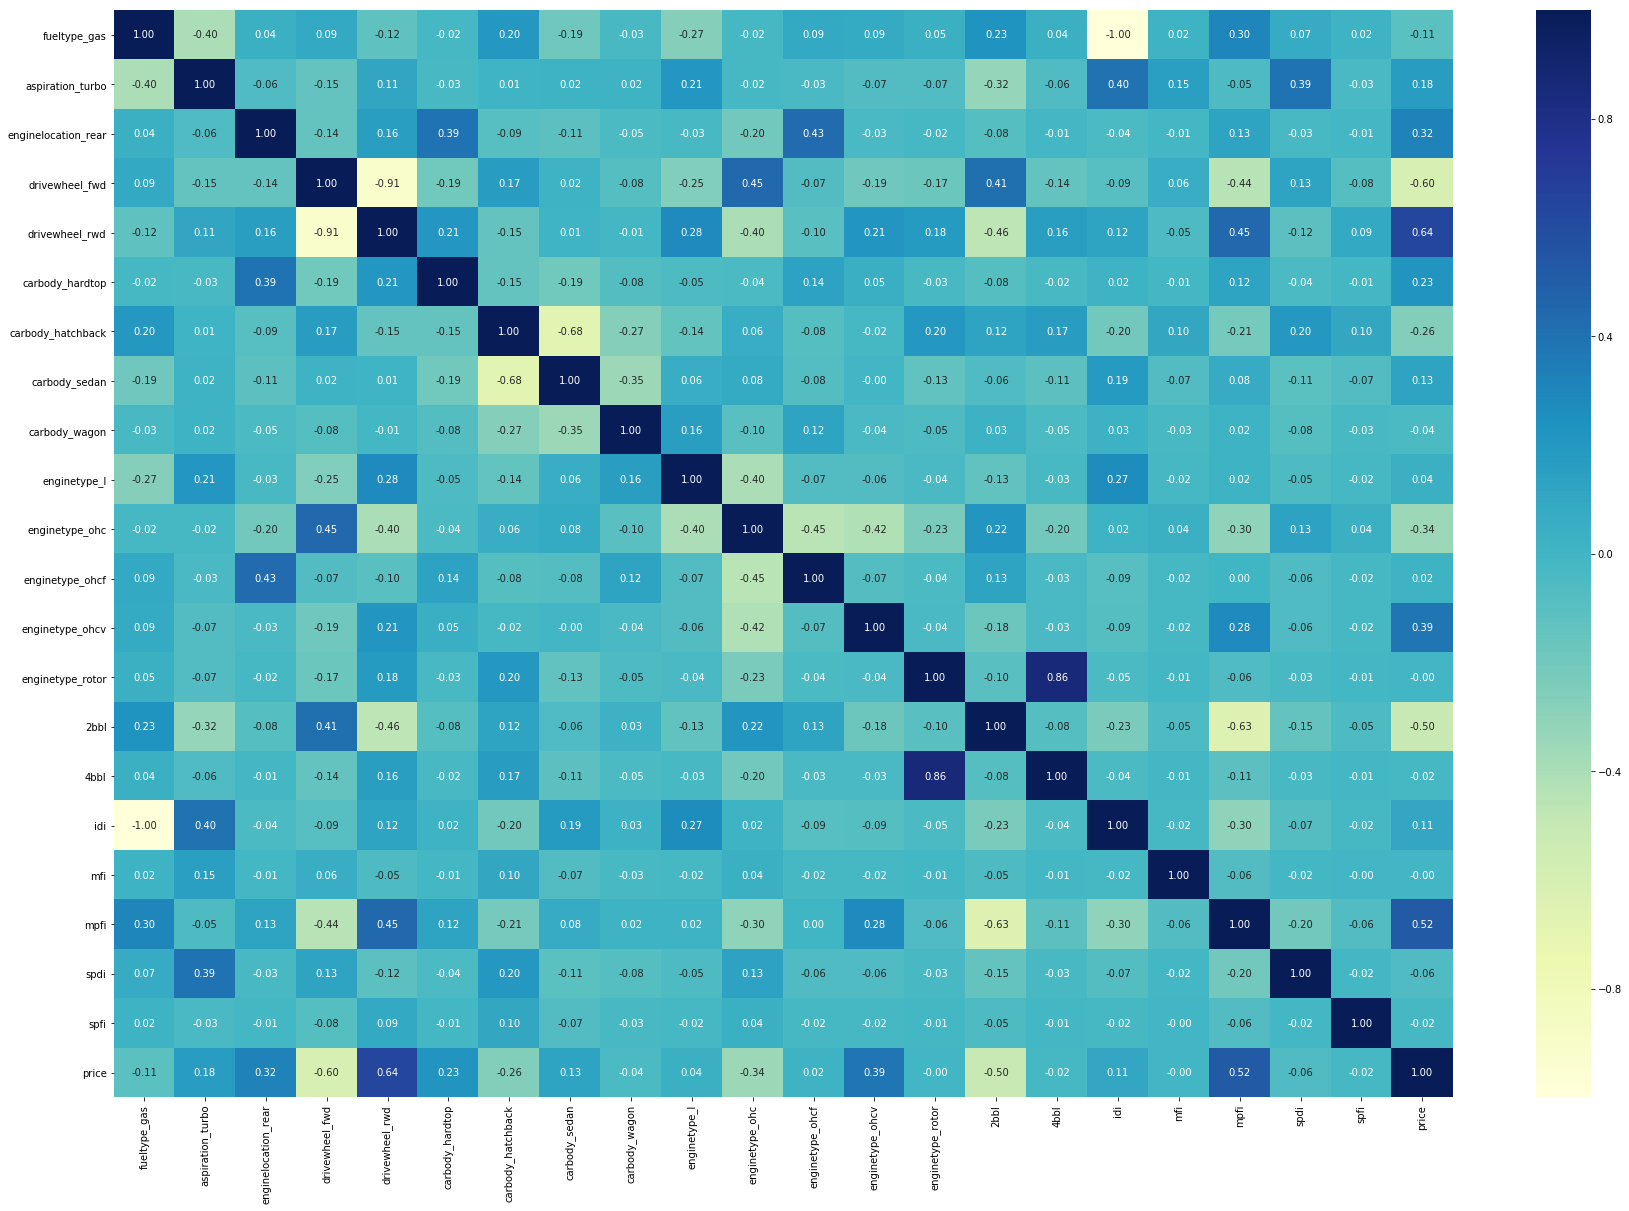

In [40]:
x = carlist[['fueltype_gas','aspiration_turbo','enginelocation_rear','drivewheel_fwd','drivewheel_rwd','carbody_hardtop',
'carbody_hatchback','carbody_sedan','carbody_wagon','enginetype_l','enginetype_ohc','enginetype_ohcf','enginetype_ohcv','enginetype_rotor',
'2bbl','4bbl','idi','mfi','mpfi','spdi','spfi','price']]
cor = x.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu",fmt='.2f',annot=True)
plt.show()

Correlation between carmodels versus price

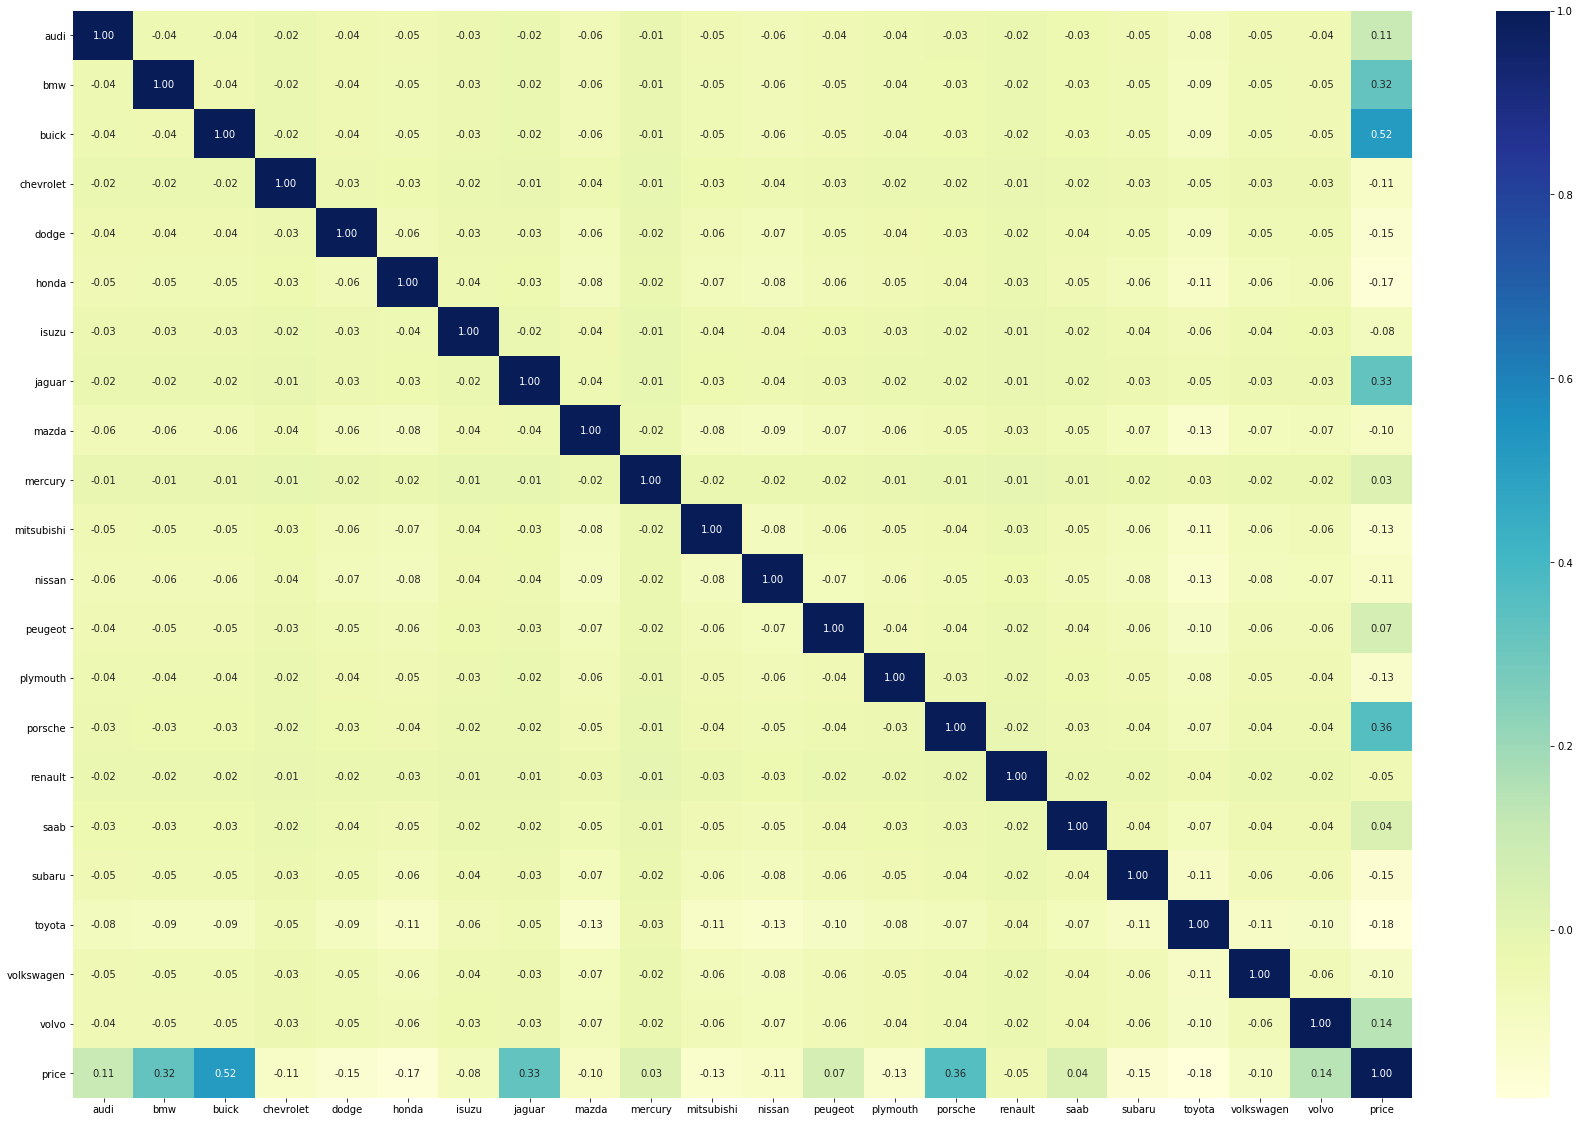

In [41]:
y = carlist[['audi','bmw','buick','chevrolet','dodge','honda','isuzu','jaguar','mazda','mercury','mitsubishi','nissan','peugeot','plymouth',  'porsche','renault','saab','subaru','toyota','volkswagen','volvo','price']]
cor = y.corr()
plt.figure(figsize=(30,20))
sns.heatmap(cor, cmap="YlGnBu", fmt='.2f',annot=True)
plt.show()

###### Observations:
Car companies that are highly correlated with price are buick,porsche,jaguar,bmw,volvo and audi. These are companies that produced high end cars.

# Model Building

In [42]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carlist, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling

We will use MinMax scaling on all columns including the derived variables.
We exclude the dummy variables from scaling as they are already scaled.

Variables to be scaled are :
1. symboling
2. doornumber
3. wheelbase
4. cylindernumber
5. enginesize
6. compressionratio
7. peakrpm
8. price
9. mpg
10. carlength
11. carwidth
12. carheight
13. stroketobr
14. powertoweight

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to all the columns except dummy variables
num_values = ['symboling','doornumber','wheelbase','cylindernumber','enginesize','compressionratio','peakrpm','price','mpg','carlength','carwidth','carheight','stroketobr','powertoweight']

df_train[num_values] = scaler.fit_transform(df_train[num_values])

In [45]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,cylindernumber,enginesize,compressionratio,peakrpm,...,porsche,renault,saab,subaru,toyota,volkswagen,volvo,mpg,stroketobr,powertoweight
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.559441,0.559441,0.411141,0.525476,0.461655,0.509004,0.240559,0.241351,0.190787,0.400029,...,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958,0.535282,0.539217,0.301305
std,0.239200,0.498199,0.205581,0.204848,0.184517,0.215378,0.115818,0.154619,0.237181,0.196438,...,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198,0.150397,0.191966,0.139794
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,0.272414,0.399187,0.304167,0.353982,0.200000,0.135849,0.100000,0.265306,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.464115,0.478818,0.218294
50%,0.600000,1.000000,0.341379,0.502439,0.425000,0.522124,0.200000,0.184906,0.125000,0.428571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.531100,0.591569,0.268725
75%,0.600000,1.000000,0.503448,0.669919,0.550000,0.668142,0.200000,0.301887,0.150000,0.551020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.614325,0.663918,0.360401
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Recursive Feature Elimination

It will be tedious to preform manual feature selection because there are 56 columns in our data set. Hence, performing RFE with top 25 features to be selected.

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
# Extracting the target variable from the dataframe
y_train = df_train.pop('price')
# Retain rest of the dataframe as predictor variables
X_train = df_train

In [48]:
# Running RFE with the output number of the variable equal to 25       
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 25)             
rfe = rfe.fit(X_train, y_train)

In [49]:
# Check the RFE support and ranking of all the predictor variables
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 22),
 ('doornumber', False, 27),
 ('wheelbase', False, 9),
 ('carlength', False, 10),
 ('carwidth', True, 1),
 ('carheight', False, 5),
 ('cylindernumber', True, 1),
 ('enginesize', True, 1),
 ('compressionratio', True, 1),
 ('peakrpm', True, 1),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 6),
 ('enginelocation_rear', True, 1),
 ('drivewheel_fwd', False, 21),
 ('drivewheel_rwd', False, 28),
 ('carbody_hardtop', False, 16),
 ('carbody_hatchback', False, 15),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 19),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 26),
 ('enginetype_ohcf', False, 4),
 ('enginetype_ohcv', False, 13),
 ('enginetype_rotor', True, 1),
 ('2bbl', False, 20),
 ('4bbl', True, 1),
 ('idi', True, 1),
 ('mfi', False, 31),
 ('mpfi', False, 25),
 ('spdi', False, 24),
 ('spfi', False, 29),
 ('audi', True, 1),
 ('bmw', True, 1),
 ('buick', False, 11),
 ('chevrolet', False, 3),
 ('dodge', True, 1),
 ('honda', True, 1),
 ('isu

In [50]:
# Considering all the variables whose rfe support is true
columns = X_train.columns[rfe.support_]
# Creating X_train_1 dataframe with RFE selected variables
X_train_1 = X_train[columns]
X_train_1.head()

,carwidth,cylindernumber,enginesize,compressionratio,peakrpm,fueltype_gas,enginelocation_rear,enginetype_l,enginetype_rotor,4bbl,...,mazda,mitsubishi,nissan,peugeot,plymouth,porsche,renault,subaru,volkswagen,powertoweight
122,0.291667,0.2,0.139623,0.15000,0.551020,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.169146
125,0.666667,0.2,0.339623,0.15625,0.551020,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0.480607
166,0.308333,0.2,0.139623,0.15000,1.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.438242
1,0.316667,0.2,0.260377,0.12500,0.346939,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.360040
199,0.575000,0.2,0.260377,0.03125,0.387755,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.478148


### Building model using statsmodel

#### Backward selection

In this method, the model is fitted with all the features. Then the least significant feature (p-value<0.05) is dropped, so long as it is not significant at our chosen critical level. Continue to successively re-fitting reduced models and applying the same rule until all remaining features are statistically significant.

##### Steps for model building
1. Adding intercept value to the train data set
2. Executing the linear model using Ordinary Least Squares method 
3. Print the summary to check the statistical values obtained from the model
4. Drop the variable having the highest p-value as it is a feature that is least helpful in prediction
5. Calculate the VIF of the variables as drop the variable which has VIF greater than 5 as it exhibits multicollinearity.
6. Repeat process 4 and 5 until all variables have VIF less than 5 and p-value less than 0.05

In [51]:
# Import statsmodel libraries to perform ordinary least squares method and calculate VIF
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Function to determine the variance inflation factors
def vif_determine(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return (vif)

##### First model

In [53]:
X_train_1 = sm.add_constant(X_train_1)
lm_1 = sm.OLS(y_train,X_train_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           5.70e-60
Time:                        21:10:56   Log-Likelihood:                 215.85
No. Observations:                 143   AIC:                            -381.7
Df Residuals:                     118   BIC:                            -307.6
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1741    

###### R-squared: 0.938,  Adj. R-squared: 0.925
Removing cylindernumber as it has highest p-value(0.223). Dropping the variable and building the model again.

In [54]:
X_train_1_p = X_train_1.drop(['cylindernumber'], axis=1)

Checking for multicollinearity issues

In [55]:
# Determine VIF
X_train_1_p = X_train_1_p.drop(['const'], axis=1)
vif_determine(X_train_1_p)

,Features,VIF
9,idi,85.65
2,compressionratio,53.74
4,fueltype_gas,41.83
17,peugeot,10.30
6,enginetype_l,9.37
1,enginesize,5.66
7,enginetype_rotor,5.03
0,carwidth,4.83
8,4bbl,4.02
23,powertoweight,3.98


In [56]:
# Removing feature with highest VIF
X_train_2 = X_train_1_p.drop(['idi'], axis=1)

##### Second model

In [57]:
X_train_2 = sm.add_constant(X_train_2)
lm_2 = sm.OLS(y_train,X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     77.33
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.33e-60
Time:                        21:10:56   Log-Likelihood:                 214.95
No. Observations:                 143   AIC:                            -381.9
Df Residuals:                     119   BIC:                            -310.8
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5122    

###### R-squared: 0.937, Adjusted R-square : 0.925. 
4bbl has a high p-value of 0.175. Dropping the variable and building the model again.

In [58]:
X_train_2_p = X_train_2.drop(['4bbl'], axis=1)

Checking for multicollinearity issues

In [59]:
# Determine VIF
X_train_2_p = X_train_2_p.drop(['const'], axis=1)
vif_determine(X_train_2_p)

,Features,VIF
0,carwidth,33.42
21,powertoweight,20.30
1,enginesize,19.01
4,fueltype_gas,17.64
3,peakrpm,16.10
15,peugeot,10.72
6,enginetype_l,9.99
2,compressionratio,3.38
17,porsche,2.09
7,enginetype_rotor,1.91


In [60]:
# Removing feature with high VIF
X_train_3 = X_train_2_p.drop(['carwidth'], axis=1)

##### Third model

In [61]:
X_train_3 = sm.add_constant(X_train_3)
lm_3 = sm.OLS(y_train,X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     57.98
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.72e-53
Time:                        21:10:56   Log-Likelihood:                 188.81
No. Observations:                 143   AIC:                            -333.6
Df Residuals:                     121   BIC:                            -268.4
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7478    

###### R-squared: 0.910, Adj. R-squared: 0.894 
audi has a high p-value of 0.381. Dropping the variable and building the model again.

In [62]:
X_train_3_p = X_train_3.drop(['audi'], axis=1)

Checking for multicollinearity issues

In [63]:
# Determine VIF
X_train_3_p = X_train_3_p.drop(['const'], axis=1)
vif_determine(X_train_3_p)

,Features,VIF
19,powertoweight,20.29
3,fueltype_gas,15.28
2,peakrpm,14.93
5,enginetype_l,9.56
13,peugeot,9.49
0,enginesize,9.43
1,compressionratio,2.36
15,porsche,1.96
6,enginetype_rotor,1.83
10,mazda,1.82


In [64]:
# Removing feature with high VIF
X_train_4 = X_train_3_p.drop(['powertoweight'], axis=1)

##### Fourth model

In [65]:
X_train_4 = sm.add_constant(X_train_4)
lm_4 = sm.OLS(y_train,X_train_4).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     62.15
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           9.62e-54
Time:                        21:10:56   Log-Likelihood:                 185.75
No. Observations:                 143   AIC:                            -331.5
Df Residuals:                     123   BIC:                            -272.3
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7041    

######  R-squared: 0.906, Adj. R-squared: 0.891 . 
enginetype_l has a high p-value of 0.440. Dropping the variable and building the model again.

In [66]:
# Removing variable having highest p-value.
X_train_4_p = X_train_4.drop(['enginetype_l'], axis=1)

Checking for multicollinearity issues

In [67]:
# Determine VIF
X_train_4_p = X_train_4_p.drop(['const'], axis=1)
vif_determine(X_train_4_p)

,Features,VIF
3,fueltype_gas,14.26
2,peakrpm,12.12
0,enginesize,4.76
1,compressionratio,2.26
9,mazda,1.80
5,enginetype_rotor,1.77
14,porsche,1.65
8,honda,1.51
4,enginelocation_rear,1.51
16,subaru,1.35


In [68]:
# Removing feature with high VIF
X_train_5 = X_train_4_p.drop(['fueltype_gas'], axis=1)

##### Fifth model

In [69]:
X_train_5 = sm.add_constant(X_train_5)
lm_5 = sm.OLS(y_train,X_train_5).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     56.46
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.09e-50
Time:                        21:10:56   Log-Likelihood:                 171.45
No. Observations:                 143   AIC:                            -306.9
Df Residuals:                     125   BIC:                            -253.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1236    

###### R-squared: 0.885, Adj. R-squared: 0.869 . 
peugeot has a high p-value of 0.854. Dropping the variable and building the model again.

In [70]:
# Removing feature having the highest p-value.
X_train_6 = X_train_5.drop(['peugeot'], axis=1)

Checking for multicollinearity issues

In [71]:
# Determine VIF
X_train_6 = X_train_6.drop(['const'], axis=1)
vif_determine(X_train_6)

,Features,VIF
2,peakrpm,4.77
0,enginesize,3.31
1,compressionratio,1.69
4,enginetype_rotor,1.68
8,mazda,1.62
12,porsche,1.62
3,enginelocation_rear,1.50
7,honda,1.49
10,nissan,1.26
6,dodge,1.24


All the variables have VIF less than 5. We will continue to build models based on dropping the features that have high p-values. 

#### Sixth model

In [72]:
X_train_6 = sm.add_constant(X_train_6)
lm_6 = sm.OLS(y_train,X_train_6).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     60.45
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.97e-51
Time:                        21:10:56   Log-Likelihood:                 171.43
No. Observations:                 143   AIC:                            -308.9
Df Residuals:                     126   BIC:                            -258.5
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1246    

###### R-squared:  0.885, Adj. R-squared:  0.870 . 
volkswagen has a high p-value of 0.260. Dropping the variable and building the model again.

In [73]:
# Removing variable with highest p-value.
X_train_7 = X_train_6.drop(['volkswagen'], axis=1)

#### Seventh model

In [74]:
X_train_7 = sm.add_constant(X_train_7)
lm_7 = sm.OLS(y_train,X_train_7).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     64.25
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           9.11e-52
Time:                        21:10:56   Log-Likelihood:                 170.70
No. Observations:                 143   AIC:                            -309.4
Df Residuals:                     127   BIC:                            -262.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1262    

###### R-squared: 0.884, Adj. R-squared:  0.870
subaru has a high p-value of 0.244. Dropping the variable and building the model again.

In [75]:
# Removing variable with highest p-value.
X_train_8 = X_train_7.drop(['subaru'], axis=1)

#### Eigth model

In [76]:
X_train_8 = sm.add_constant(X_train_8)
lm_8 = sm.OLS(y_train,X_train_8).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     68.54
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           2.11e-52
Time:                        21:10:57   Log-Likelihood:                 169.94
No. Observations:                 143   AIC:                            -309.9
Df Residuals:                     128   BIC:                            -265.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1411    

##### R-squared: 0.882, Adj. R-squared:0.869
enginelocation_rear has a high p-value of 0.251. Dropping the variable and building the model again.

In [77]:
# Removing variable with highest p-value.
X_train_9 = X_train_8.drop(['enginelocation_rear'], axis=1)

#### Ninth model

In [78]:
X_train_9 = sm.add_constant(X_train_9)
lm_9 = sm.OLS(y_train,X_train_9).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     73.53
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           4.62e-53
Time:                        21:10:57   Log-Likelihood:                 169.20
No. Observations:                 143   AIC:                            -310.4
Df Residuals:                     129   BIC:                            -268.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1429      0.027  

###### R-squared: 0.881, Adj. R-squared: 0.869
mazda has a high p-value of 0.171. Dropping the variable and building the model again.

In [79]:
# Removing variable with highest p-value.
X_train_10 = X_train_9.drop(['mazda'], axis=1)

#### Tenth model

In [80]:
X_train_10 = sm.add_constant(X_train_10)
lm_10 = sm.OLS(y_train,X_train_10).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     78.95
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.29e-53
Time:                        21:10:57   Log-Likelihood:                 168.16
No. Observations:                 143   AIC:                            -310.3
Df Residuals:                     130   BIC:                            -271.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1513      0.026  

###### R-squared: 0.879,Adj. R-squared: 0.868
plymouth has a high p-value of 0.154. Dropping the variable and building the model again.

In [81]:
# Removing variable with highest p-value.
X_train_11 = X_train_10.drop(['plymouth'], axis=1)

#### Eleventh model

In [82]:
X_train_11 = sm.add_constant(X_train_11)
lm_11 = sm.OLS(y_train,X_train_11).fit()
print(lm_11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     85.25
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           3.73e-54
Time:                        21:10:57   Log-Likelihood:                 167.03
No. Observations:                 143   AIC:                            -310.1
Df Residuals:                     131   BIC:                            -274.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1511      0.026  

###### R-squared: 0.877, Adj. R-squared:  0.867
dodge has a high p-value of 0.134. Dropping the variable and building the model again.

In [83]:
# Removing variable with highest p-value.
X_train_12 = X_train_11.drop(['dodge'], axis=1)

#### Twelveth model

In [84]:
X_train_12 = sm.add_constant(X_train_12)
lm_12 = sm.OLS(y_train,X_train_12).fit()
print(lm_12.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     92.66
Date:                Sun, 24 Feb 2019   Prob (F-statistic):           1.15e-54
Time:                        21:10:57   Log-Likelihood:                 165.81
No. Observations:                 143   AIC:                            -309.6
Df Residuals:                     132   BIC:                            -277.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1511      0.026  

###### Observations: 
The following observations seen from the model results show that this model is a fairly good model
1. Adjusted R-square : 0.866 and R-squared:0.875. A difference of 0.009 exists between them.
2. Prob (F-statistic): 1.15e-54 - This is negligible, almost equal to zero.
3. All variables have their p-values less than 0.05 thus making all the variables in this model significant.
4. AIC and BIC values are negative indicating optimal number of variables are used in the model.

### Residual Analysis of the train data

Lets check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [85]:
y_train_pred = lm_12.predict(X_train_12)
res=(y_train - y_train_pred)

In [86]:
res.skew()

0.39132365256785157

Text(0.5,0,'Errors')

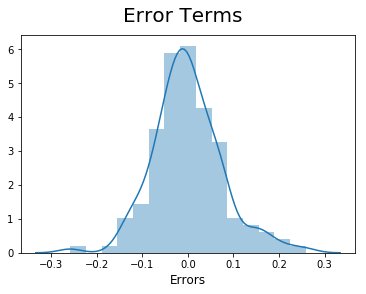

In [87]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 12)                         # X-label

The error terms appear fairly normally distrbuted. Skewness value of the prediction to that of actual train data is 0.39.
Since skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
##### Hence we can say that model 12 is good for making predictions

###### Which variables are significant in predicting the price of a car?  
The variables are enginesize, compression ratio, peakrpm, rotor enginetype and car companies like BMW,Honda,Mitsubishi,Nissan,Porsche and Renault.

## Model Testing

In [88]:
num_values = ['symboling','doornumber','wheelbase','cylindernumber','enginesize','compressionratio','peakrpm','price','mpg','carlength','carwidth','carheight','stroketobr','powertoweight']

df_test[num_values] = scaler.transform(df_test[num_values])

In [89]:
# Statistical summary of test data
df_test.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,cylindernumber,enginesize,compressionratio,peakrpm,...,porsche,renault,saab,subaru,toyota,volkswagen,volvo,mpg,stroketobr,powertoweight
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.564516,0.437764,0.559481,0.480376,0.559663,0.232258,0.265673,0.209375,0.393351,...,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645,0.520450,0.512517,0.319133
std,0.271724,0.499868,0.212861,0.189947,0.165440,0.215811,0.088288,0.162820,0.273690,0.192092,...,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512,0.145655,0.175356,0.159380
min,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.200000,0.067925,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.185455,0.000000,0.046209
25%,0.400000,0.000000,0.313793,0.459350,0.358333,0.384956,0.200000,0.177358,0.093750,0.265306,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.469697,0.375673,0.218895
50%,0.600000,1.000000,0.387931,0.547967,0.441667,0.588496,0.200000,0.226415,0.125000,0.346939,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.501976,0.504516,0.278451
75%,0.800000,1.000000,0.570690,0.719919,0.516667,0.699115,0.200000,0.316038,0.150000,0.540816,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.580700,0.654071,0.409660
max,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.600000,0.932075,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.814219,0.840724


In [90]:
# Dividing into test set of predictor and target variables
y_test = df_test.pop('price')
X_test = df_test
y_test.describe()

count    62.000000
mean      0.239439
std       0.233076
min       0.007763
25%       0.092342
50%       0.158991
75%       0.317243
max       1.112855
Name: price, dtype: float64

In [91]:
# Creating X_test_m12 dataframe by dropping variables from X_test
X_train_lm = X_train_12.drop(['const'], axis=1)
X_test_m12 = X_test[X_train_lm.columns]
# Adding constant variable to test dataframe
X_test_m12 = sm.add_constant(X_test_m12)
X_test_m12.describe()

,const,enginesize,compressionratio,peakrpm,enginetype_rotor,bmw,honda,mitsubishi,nissan,porsche,renault
count,62.0,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.0
mean,1.0,0.265673,0.209375,0.393351,0.0,0.032258,0.064516,0.064516,0.064516,0.032258,0.0
std,0.0,0.162820,0.273690,0.192092,0.0,0.178127,0.247676,0.247676,0.247676,0.178127,0.0
min,1.0,0.067925,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.0,0.177358,0.093750,0.265306,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.0,0.226415,0.125000,0.346939,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,1.0,0.316038,0.150000,0.540816,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,1.0,0.932075,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [92]:
# Making predictions using model 12
y_test_pred = lm_12.predict(X_test_m12)
y_test_pred.describe()

count    62.000000
mean      0.247680
std       0.206680
min      -0.026141
25%       0.122972
50%       0.192006
75%       0.291297
max       0.971386
dtype: float64

### Model evaluation

Text(0,0.5,'y_pred')

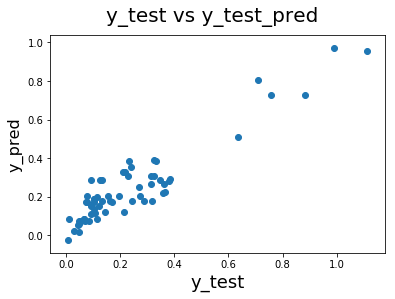

In [93]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

We can see that the equation of our best fitted line is:

$ price = 1.1708  \times enginesize + 0.1195  \times compressionratio + 0.1664  \times peakrpm + 0.1750  \times enginetyperotor + 0.2096  \times bmw -0.0694  \times honda -0.0751  \times mitsubishi -0.0783  \times nissan + 0.1512  \times porsche - 0.1161  \times renault -0.1511 $

In [94]:
(y_test - y_test_pred).skew()

0.11040866838548953

In [95]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_test_pred)
r_squared = r2_score(y_test, y_test_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.007171218793870747
r_square_value : 0.8658287068048822


###### Evaluation summary :
1. The mean squared error value for the test data is very close to zero.
2. Skewness value of the prediction to that of actual test data is 0.11.
3. The R-squared value of the train set was found to be 87.5 while the R-squared value of the test set was found to be 86.6. Since the difference between the train and test set is only 0.9%, we can say the model can be considered to be fairly good model.

###### Now we can answer the question, How well these variables describe the price of a car?

###### Engine size
1. Engine size is the swept volume of all the pistons inside the cylinders of a reciprocating engine in a single movement.
2. This feature has the highest correlation with price(0.87).
3. Engine size is also highly correlated with other features that are correlated with price namely curbweight(0.85), horsepower(0.81), carlength(0.68), carwidth(0.74), wheelbase(0.57), cylinder number(0.85) and boreratio(0.58)
4. It has the highest beta co-efficient(1.1708) among other variables indicating it to be a highest contributor in price prediction.
5. A larger engine is usually able to burn more fuel and produce more power than a smaller one.A car with a larger, more powerful engine is likely to be able to accelerate faster and tow heavier loads than a car with a smaller engine can manage.

###### Compression Ratio
1. Compression Ratio is the ratio of the maximum to minimum volume in the cylinder of an internal combustion engine. 
2. It is the next variable having a positive influence on price prediction as it has a beta co-efficient of 0.1195.
3. Increasing compression is the most productive way to increase horsepower. Build compression into your engine and you build in power.
4. Car engines with high compression ratio can improve fuel efficiency and fuel economy as well. 

###### Peak RPM
1. Peak RPM is the speed of rotation of a machine expressed in revolutions per minute.
2. The beta co-efficient of peakrpm is 0.1664.
3. The general philosophy with peak rpm is higher revolutions per minute equate to more fuel burnt in the same amount of time and more power produced. 
4. This leads to better acceleration, top speed and overall driving enjoyment.

###### Rotor engine type
1. Rotor engine is an internal-combustion engine having radial cylinders that rotate about a fixed crankshaft.
2. The beta co-efficient of rotor engine type is 0.1750
3. Advantages of rotor engine type over other engine types are smooth operation, improved cooling and a substantial power-to-weight ratio advantage by having no need for an added flywheel.

###### Car companies like BMW,Porsche
1. Beta co-efficients of BMW and Porsche are 0.2096 and 0.1512 respectively.
2. BMW have cars with a price range of 16000 to 42000 while Porsche has cars that have a price range of 30000 to 37000.

###### Car companies like Honda,Mitsubishi,Nissan and Renault
1. These car companies have negative beta co-efficients. Hence they inversely impact on the car prices.

Finally, the suggestion to Geely Auto is :
1. Aim at making cars having large engine size in order to sell their cars at high price.
2. Engines with higher compression ratio and high peak rpm have better impact on the car pricing.
3. Use the advantages of rotor engine type in manufacturing new car models.
4. Influences from companies like BMW and Porsche would be a positive impact on prices.
5. Companies like Honda,Mitsubishi,Nissan and Renault would impact prices negatively.